## <center> Netflix EDA and Recommendation System

![](https://www.extremetech.com/wp-content/uploads/2016/03/Netflix-Feature.jpg)

Netflix is the world's leading streaming entertainment service with 208 million paid memberships in over 190 countries enjoying TV series, documentaries and feature films across a wide variety of genres and languages. Members can watch as much as they want, anytime, anywhere, on any internet-connected screen. Members can play, pause and resume watching, all without commercials or commitments.

### Here I have done a detailed analysis of netflix content data with great visualisations and built a Recommendation System.

## 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


### Reading Data

In [2]:
df = pd.read_csv(r'C:\Users\hp\Desktop\Netflix EDA & Genre Prediction\Dataset\netflix_data.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


## 2. Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


### --> Checking for missing values

In [4]:
df.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

Text(0.5, 1.0, 'COLUMN WISE MISSING VALUES')

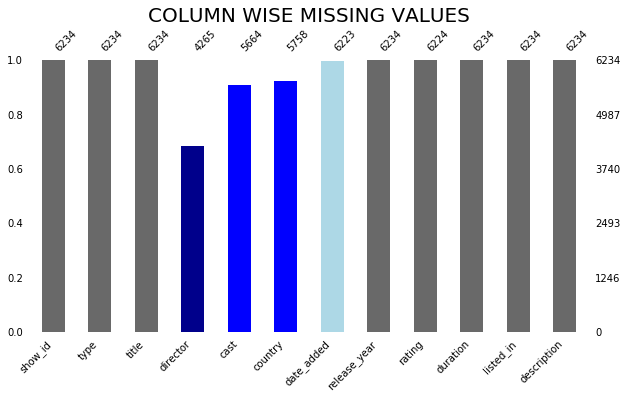

In [5]:
# Plot missing values in columns
import missingno #Python library for the exploratory visualization of missing data #install using !pip install missingno
color= ['dimgrey','dimgrey','dimgrey','darkblue','blue','blue','lightblue','dimgrey','dimgrey','dimgrey','dimgrey','dimgrey']
missingno.bar(df,fontsize=10,color=color,figsize=(10,5))
plt.title('COLUMN WISE MISSING VALUES',fontsize=20)

- There are missing values in column director,cast,country and date_added.
- We can't randomly fill the missing values in columns of director and cast, so we can drop them.
- For minimal number of missing values in country and date_added,rating, we can fill them using mode(most common value) and mean.

### --> Handling missing values

In [6]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['country'].mode()[0])

In [7]:
df = df.dropna( how='any',subset=['cast', 'director'])

In [8]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

- All the missing values in the dataset have either been removed or filled. There are no missing values left.

In [9]:
df.duplicated().sum()

0

- dataset has 0 duplicated values.

### --> Cleaning the data

Adding some new columns:
- listed_in - Genre
* Year Added - year_add
* Month Added - month_add
* Princial Country - country_main 

In [10]:
#Rename the 'listed_in' column as 'Genre' for easy understanding
df = df.rename(columns={"listed_in":"Genre"})
df['Genre'] = df['Genre'].apply(lambda x: x.split(",")[0])
df['Genre'].head()

0    Children & Family Movies
4                    Comedies
6        International Movies
7             Stand-Up Comedy
9          Action & Adventure
Name: Genre, dtype: object

In [11]:
df['year_add'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['year_add'].head()

0    2019
4    2017
6    2017
7    2017
9    2017
Name: year_add, dtype: object

In [12]:
df['month_add'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df['month_add'].head()

0    September
4    September
6    September
7    September
9    September
Name: month_add, dtype: object

In [13]:
df['country_main'] = df['country'].apply(lambda x: x.split(",")[0])
df['country_main'].head()

0    United States
4    United States
6         Bulgaria
7            Chile
9    United States
Name: country_main, dtype: object

In [14]:
df['type'].value_counts()

Movie      3805
TV Show     104
Name: type, dtype: int64

In [15]:
df['rating'].value_counts()

TV-MA            1241
TV-14             951
R                 502
TV-PG             372
PG-13             282
PG                178
NR                175
TV-Y7              62
TV-G               57
G                  36
TV-Y               26
TV-Y7-FV           15
UR                  7
United States       4
NC-17               1
Name: rating, dtype: int64

-- Making two new dataframes, one with movies collection and other with TV shows collection:
* movie_df
* tv_df

In [16]:
movie_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']

In [17]:
movie_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,year_add,month_add,country_main
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,Before planning an awesome wedding for his gra...,2019,September,United States
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017,September,United States
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,International Movies,"In a dystopian future, an insurance adjuster f...",2017,September,Bulgaria
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,2017,September,Chile
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,Action & Adventure,A struggling couple can't believe their luck w...,2017,September,United States


## 3. Exploratory Data Analysis

### --> Number of Movies vs TV Shows

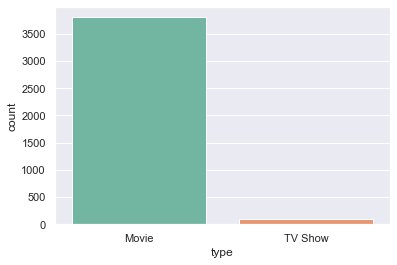

In [18]:
sb.set(style="darkgrid")
sb.countplot(x="type", data= df, palette="Set2")

- There are more Movies on Netflix than TV shows.

### --> Movies & TV Shows Ratings analysis

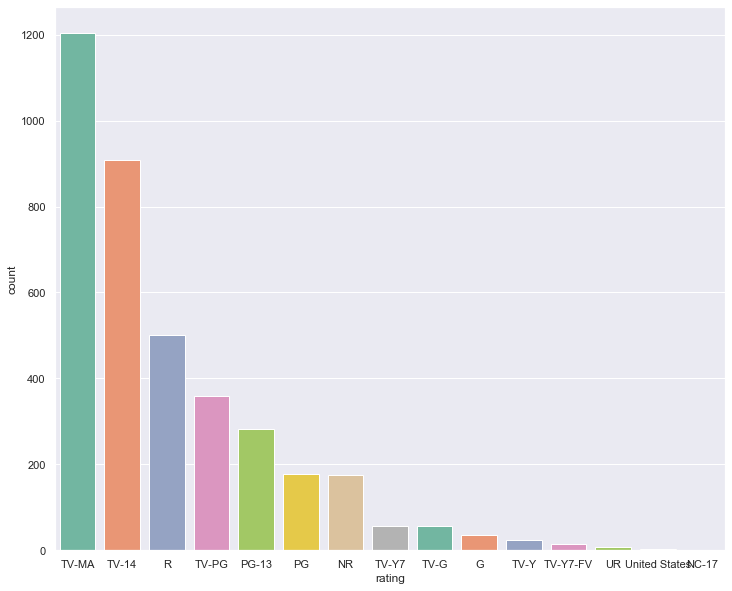

In [19]:
#MOVIES RATINGS
plt.figure(figsize=(12,10))
sb.set(style="darkgrid")
sb.countplot(x="rating", data= movie_df, palette="Set2", order=movie_df['rating'].value_counts().index[0:15])

- The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only. 
- Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.
- Third largest is the  very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17.

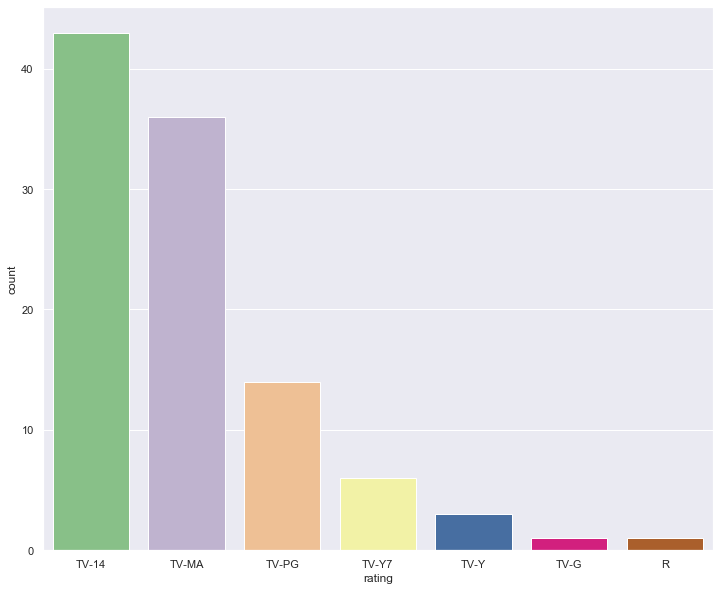

In [20]:
# TV SHOWS RATINGS
plt.figure(figsize=(12,10))
sb.set(style="darkgrid")
sb.countplot(x="rating", data=tv_df, palette="Accent", order=tv_df['rating'].value_counts().index[0:15])

- Most of the TV Shows has 'TV-14' ratings which stands for the content can be inappropriate for children under 14 years of age.
- Second highest count of ratings in TV Shows is 'TV-MA', for which the content is for matured audience only.
- TV Shows has least amount of counts with 'R' ratings.

### --> Yearly Analysis of content

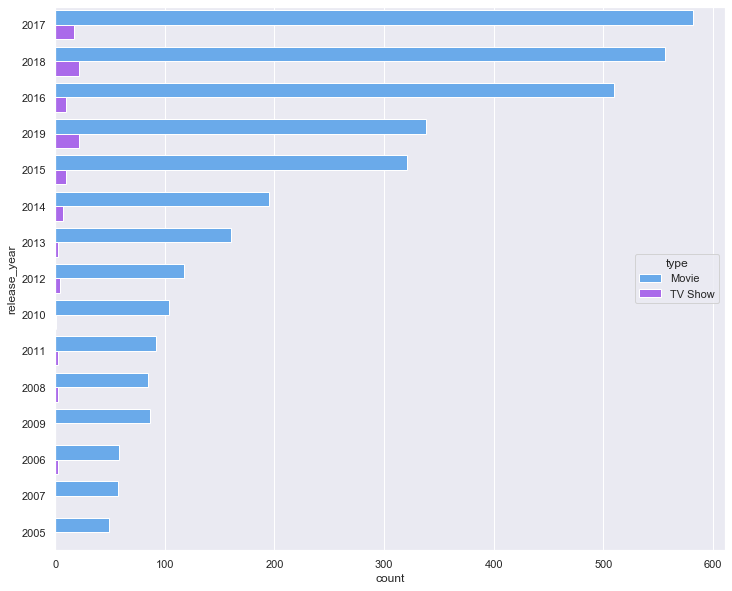

In [87]:
plt.figure(figsize=(12,10))
sb.set(style="darkgrid")
sb.countplot(y="release_year", data= df, palette="cool", order= df['release_year'].value_counts().index[0:15],hue=df['type'])

- We can see that Netflix released most number of content in year 2017.
- Noticeable growth in releasing content can be seen from the year 2015.

### --> Analysis of movies duration

In [22]:
movie_df['duration']=movie_df['duration'].str.replace(' min','')
movie_df['duration']=movie_df['duration'].astype(str).astype(int)
movie_df['duration']

0        90
4        99
6       110
7        60
9        90
       ... 
5574     81
5575    106
5578    102
5579     88
5580    109
Name: duration, Length: 3805, dtype: int32

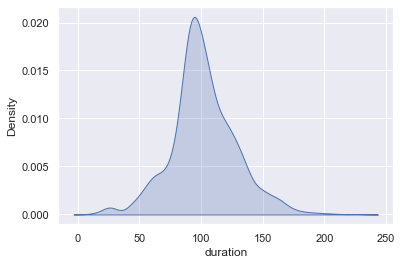

In [23]:
sb.set(style="darkgrid")
sb.kdeplot(data=movie_df['duration'], shade=True)

- So, a good amount of movies on Netflix are among the **duration of 75-120 mins.**

### --> Trends of movies duration

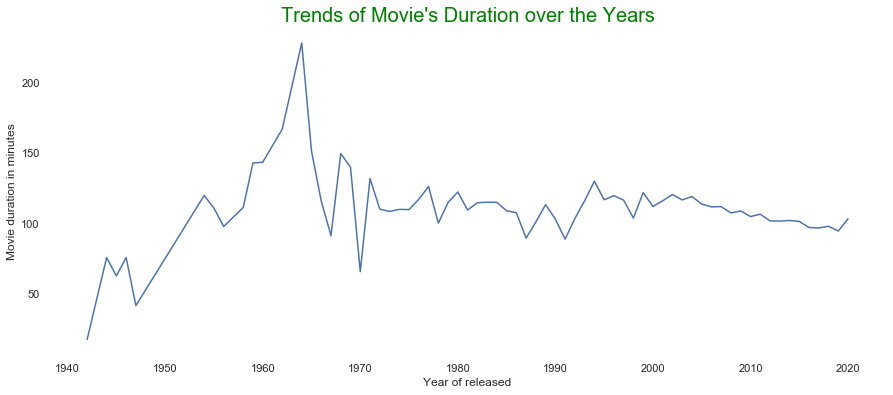

In [88]:
duration_year = movie_df.groupby(['release_year']).mean()
duration_year = duration_year.sort_index()

plt.figure(figsize=(15,6))
sb.lineplot(x=duration_year.index, y=duration_year.duration.values)
plt.box(on=None)
plt.ylabel('Movie duration in minutes');
plt.xlabel('Year of released');
plt.title("Trends of Movie's Duration over the Years", fontsize=20, color='Green');

- In the years of **1960 to 1965**, Movies durations were over **200 minutes, after 1965 the durations became comparitively shorter.**
- From the year **1980**, we can see consistent trend of movie durations, of which duration time is around in **between 100-150 minutes.**

### --> Analysis of TV Shows with most number of seasons

In [25]:
tv_df['duration']=tv_df['duration'].str.replace(' Season','')
tv_df['duration']=tv_df['duration'].str.replace('s','')
tv_df['duration']=tv_df['duration'].astype(str).astype(int)
tv_df['duration']

157     1
161     1
247     1
333     1
466     1
       ..
6142    7
6158    4
6167    2
6182    4
6213    3
Name: duration, Length: 104, dtype: int32

--> Extract TV Shows titles and its number of seasons:

In [26]:
#Extract the columns from tv_df
columns=['title','duration']
tv_shows = tv_df[columns]

In [27]:
#sort the dataframe by number of seasons
tv_shows = tv_shows.sort_values(by='duration',ascending=False)
tv_shows
top20 = tv_shows[0:20]
top20

,title,duration
5787,Supernatural,14
5633,Naruto,9
5814,Call the Midwife,8
5810,Royal Pains,8
5591,Once Upon a Time,7
6142,The Great British Baking Show,7
5803,Arrow,7
5953,Comedians in Cars Getting Coffee,6
5833,Father Brown,6
5800,The Flash,5


<Figure size 720x432 with 0 Axes>

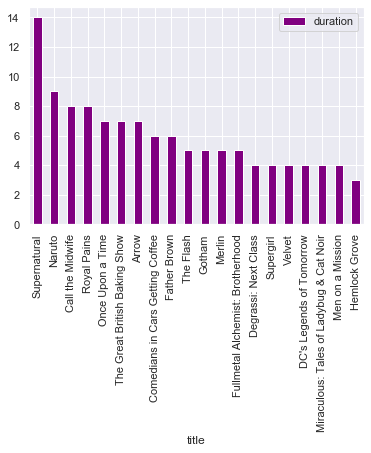

In [91]:
plt.figure(figsize=(10,6))
top20.plot(kind='bar',x='title',y='duration', color='purple')

- **Supernatural , Naruto** has the highest numbers of seasons

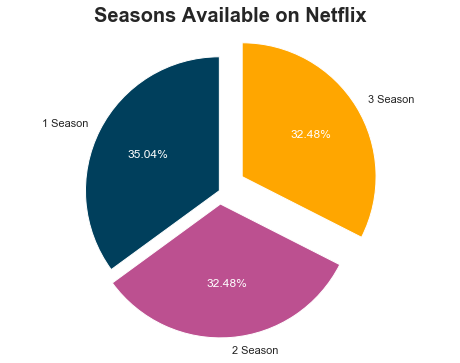

In [29]:
# TV SHOWS AND THEIR SEASONS
plt.figure(figsize=(8, 6))
labels=['1 Season', '2 Season', '3 Season']
_, _, texts = plt.pie(df.duration.value_counts()[:3], labels=labels, autopct='%1.2f%%', startangle=90, 
                      explode=(0.0, 0.1, 0.2), colors=['#003f5c', '#bc5090', '#ffa600'])
plt.axis('equal')
plt.title('Seasons Available on Netflix', fontsize=20, fontweight='bold');
for text in texts:
    text.set_color('white')

- From the chart we can analyze, **35.04% TV Shows has only 1 Season,32.48% TV Shows has 2 seasons and 32.48% Tv Shows has 3 seasons** available

### --> Countries on top for movies content creation

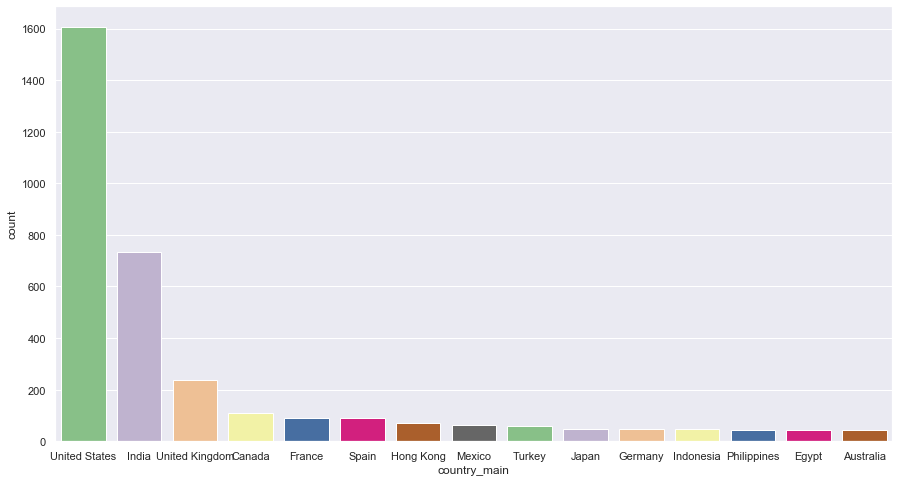

In [30]:
plt.figure(figsize=(15,8))
sb.set(style="darkgrid")
sb.countplot(x="country_main", data=movie_df, palette="Accent", order=movie_df['country_main'].value_counts().index[0:15])

- **United States** creates highest amount of movies followed by ***India and UK.***


### --> Countries on top for TV Show content creation

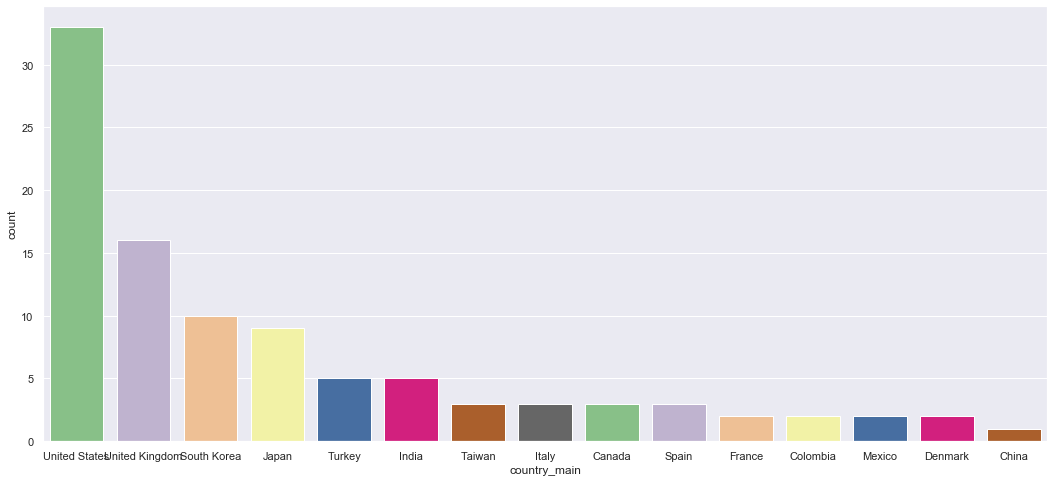

In [31]:
plt.figure(figsize=(18,8))
sb.set(style="darkgrid")
sb.countplot(x="country_main", data=tv_df, palette="Accent", order=tv_df['country_main'].value_counts().index[0:15])

- **United States,United Kingdom,South Korea,Japan** creates most of the amount of TV Shows on netflix.

### -->Understanding what content is available in different countries

In [32]:
# Different Genres from Countries
columns=['Genre','country_main']
gen_country = df[columns]

In [33]:
gen_country.head()

,Genre,country_main
0,Children & Family Movies,United States
4,Comedies,United States
6,International Movies,Bulgaria
7,Stand-Up Comedy,Chile
9,Action & Adventure,United States


In [34]:
gen_country['Genre'].value_counts()

Dramas                          1069
Comedies                         786
Action & Adventure               588
Children & Family Movies         325
Documentaries                    314
Stand-Up Comedy                  252
Horror Movies                    204
International Movies              80
Classic Movies                    54
Thrillers                         40
Movies                            30
International TV Shows            27
Crime TV Shows                    20
Independent Movies                18
British TV Shows                  17
Music & Musicals                  12
Anime Features                    11
Cult Movies                       10
Sci-Fi & Fantasy                  10
Anime Series                       8
Kids' TV                           8
Docuseries                         7
Stand-Up Comedy & Talk Shows       5
TV Shows                           5
TV Action & Adventure              2
TV Comedies                        2
Romantic Movies                    2
T

In [35]:
size = gen_country['Genre'].value_counts().tolist()
size

[1069,
 786,
 588,
 325,
 314,
 252,
 204,
 80,
 54,
 40,
 30,
 27,
 20,
 18,
 17,
 12,
 11,
 10,
 10,
 8,
 8,
 7,
 5,
 5,
 2,
 2,
 2,
 1,
 1,
 1]

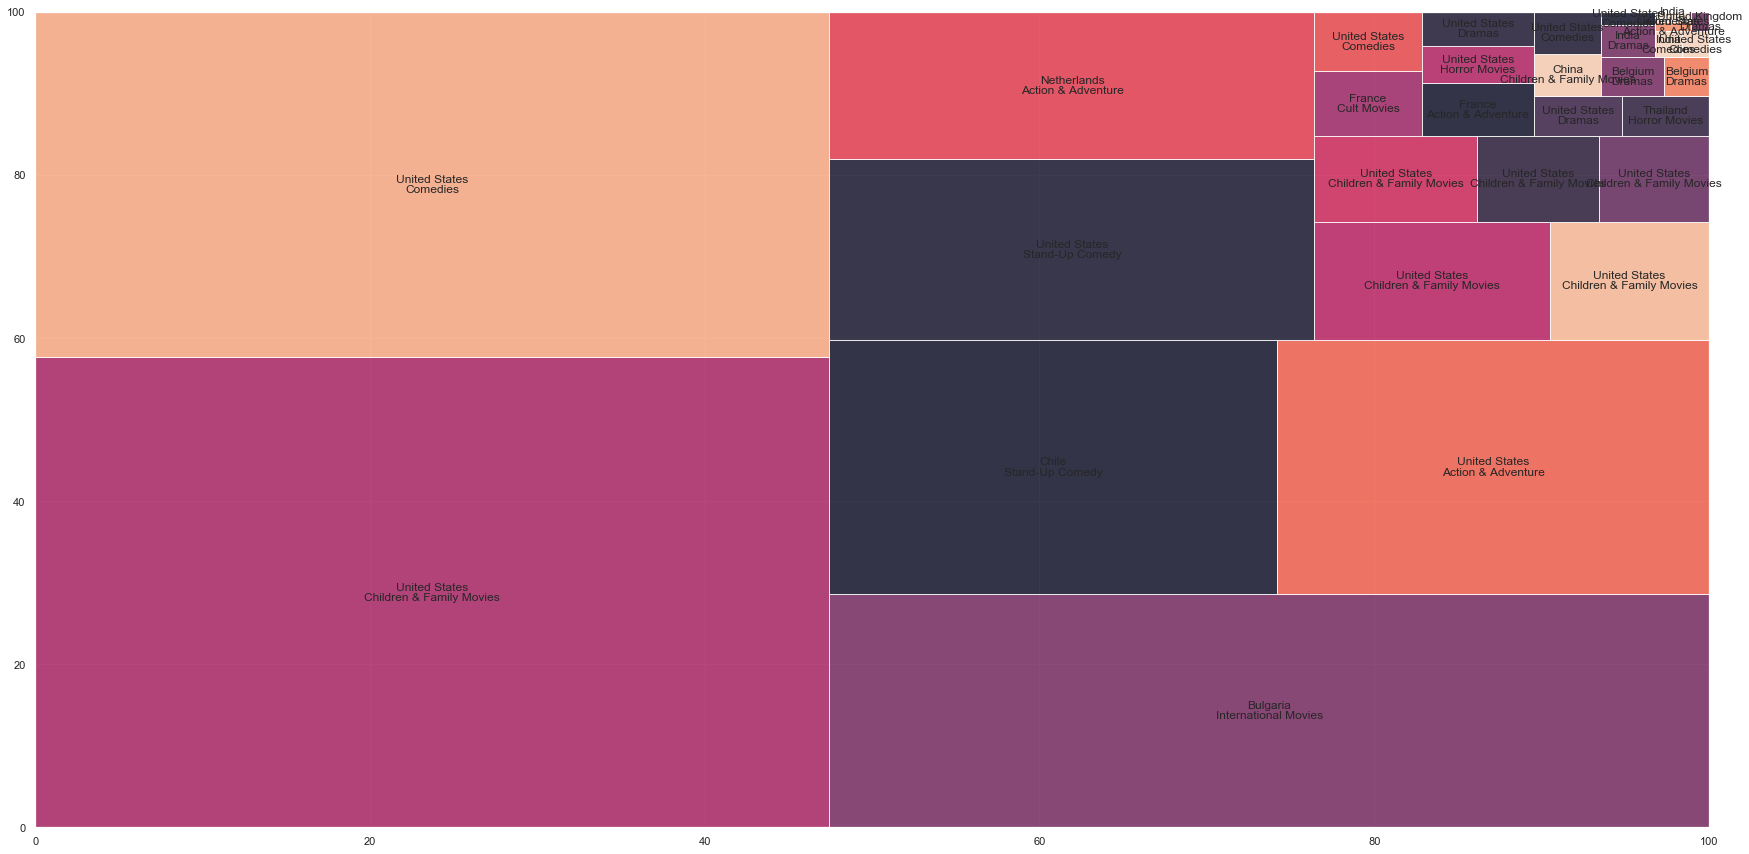

In [36]:
# GENRES BY COUNTRIES
import squarify
plt.figure(figsize=(30,15))
squarify.plot(value= gen_country['Genre'], label= gen_country['country_main'], sizes= size, alpha=0.8)
plt.rc('font', size=14)
plt.show()

- United states produces most amount of content in 'Comedies' and 'Childern & Family movies' Genres.

### --> Contents released by years

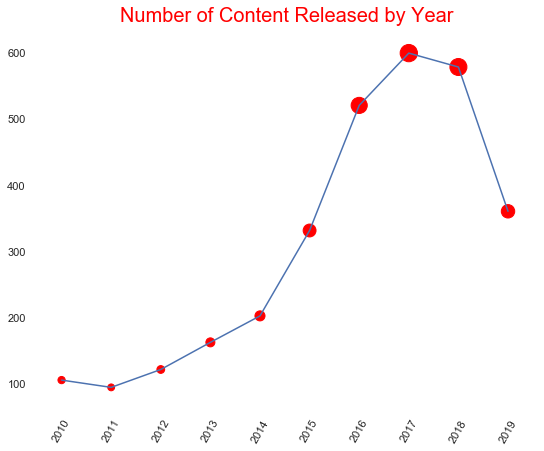

In [77]:
release = df['release_year'].value_counts()
release = release.sort_index(ascending=True)

plt.figure(figsize=(9,7))
plt.plot(release[-11:-1])
plt.scatter(release[-11:-1].index, release[-11:-1].values, s=0.5*release[-11:-1].values, c='Red');
plt.box(on=None);
plt.xticks(rotation = 60)
plt.xticks(release[-11:-1].index);
plt.title('Number of Content Released by Year', color='red', fontsize=20);

### --> Directors with most number of Movies produced

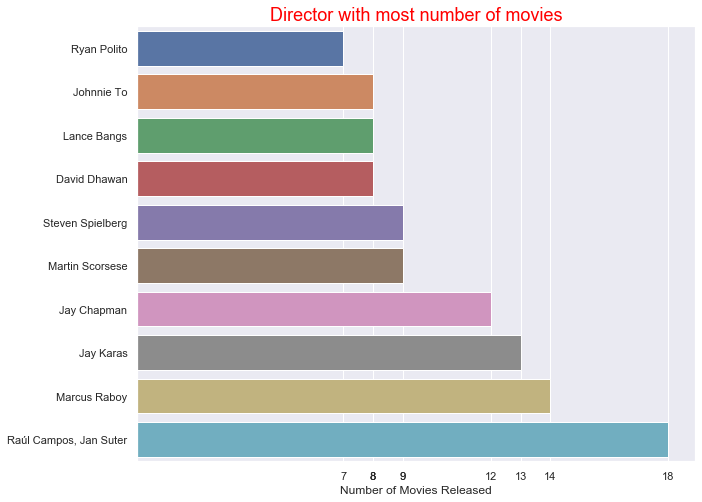

In [38]:
plt.figure(figsize=(10,8))
sb.barplot(y= movie_df.director.value_counts()[:10].sort_values().index, x=movie_df.director.value_counts()[:10].sort_values().values);
plt.title('Director with most number of movies', color='red', fontsize=18)
plt.xticks(movie_df.director.value_counts()[:10].sort_values().values);
plt.xlabel('Number of Movies Released');


- Director **Raul Campos,Jan Suter** Produced **highest number of movies: 18** on Netflix till now.

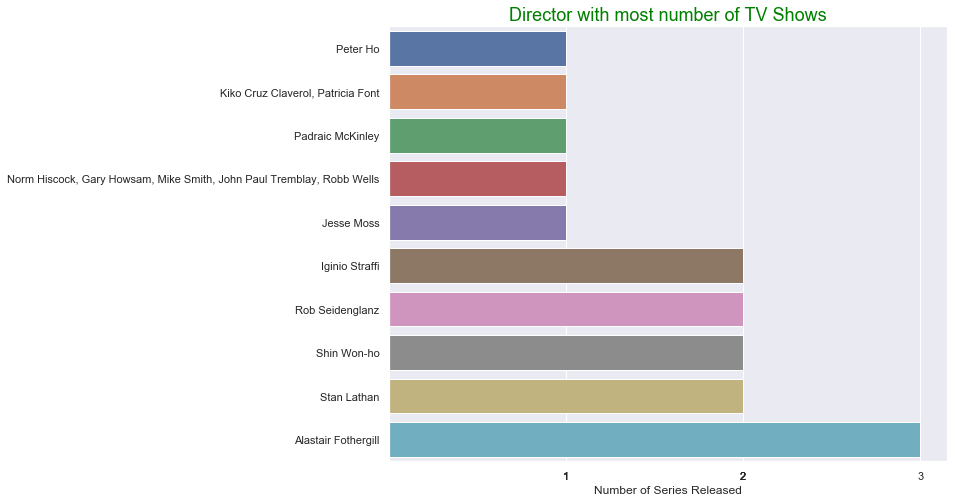

In [39]:
plt.figure(figsize=(10,8))
sb.barplot(y= tv_df.director.value_counts()[:10].sort_values().index, x=tv_df.director.value_counts()[:10].sort_values().values);
plt.title('Director with most number of TV Shows', color='green', fontsize=18)
plt.xticks(tv_df.director.value_counts()[:10].sort_values().values);
plt.xlabel('Number of Series Released');

- Director **Alastair Fothergill** released **highest number of TV shows:3** on Netflix.

### --> Most Popular Genre on Netflix

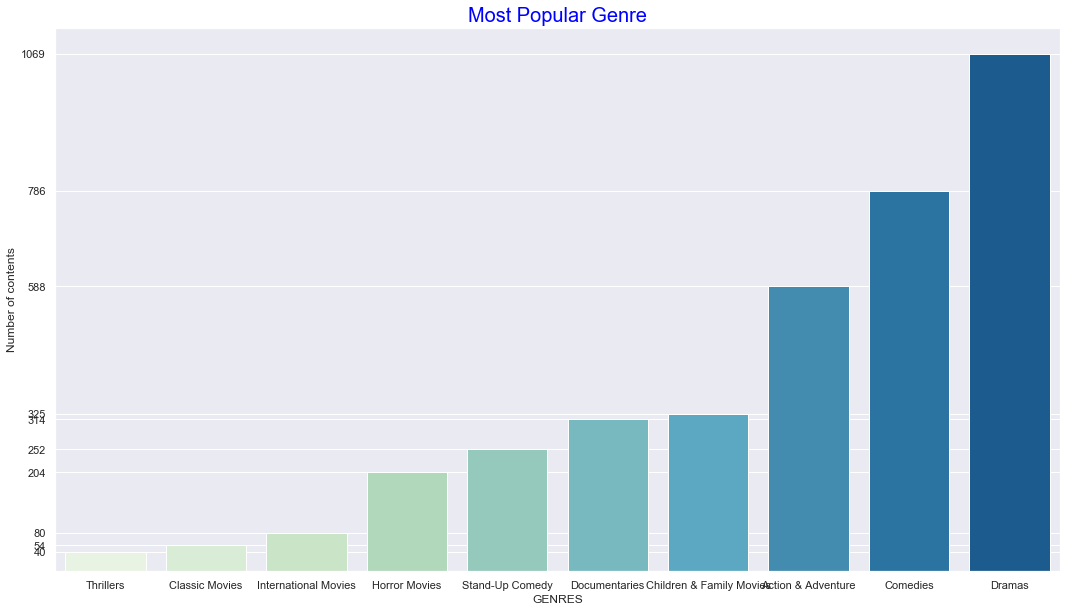

In [40]:
plt.figure(figsize=(18,10))
sb.barplot(x= df.Genre.value_counts()[:10].sort_values().index, y=df.Genre.value_counts()[:10].sort_values().values,palette='GnBu');
plt.title('Most Popular Genre', color='Blue', fontsize=20)
plt.yticks(df.Genre.value_counts()[:10].sort_values().values);
plt.xlabel('GENRES');
plt.ylabel('Number of contents');

- **Netflix knows how much we all love drama..!! :p**

### --> Top Actor/Actresses on Netflix

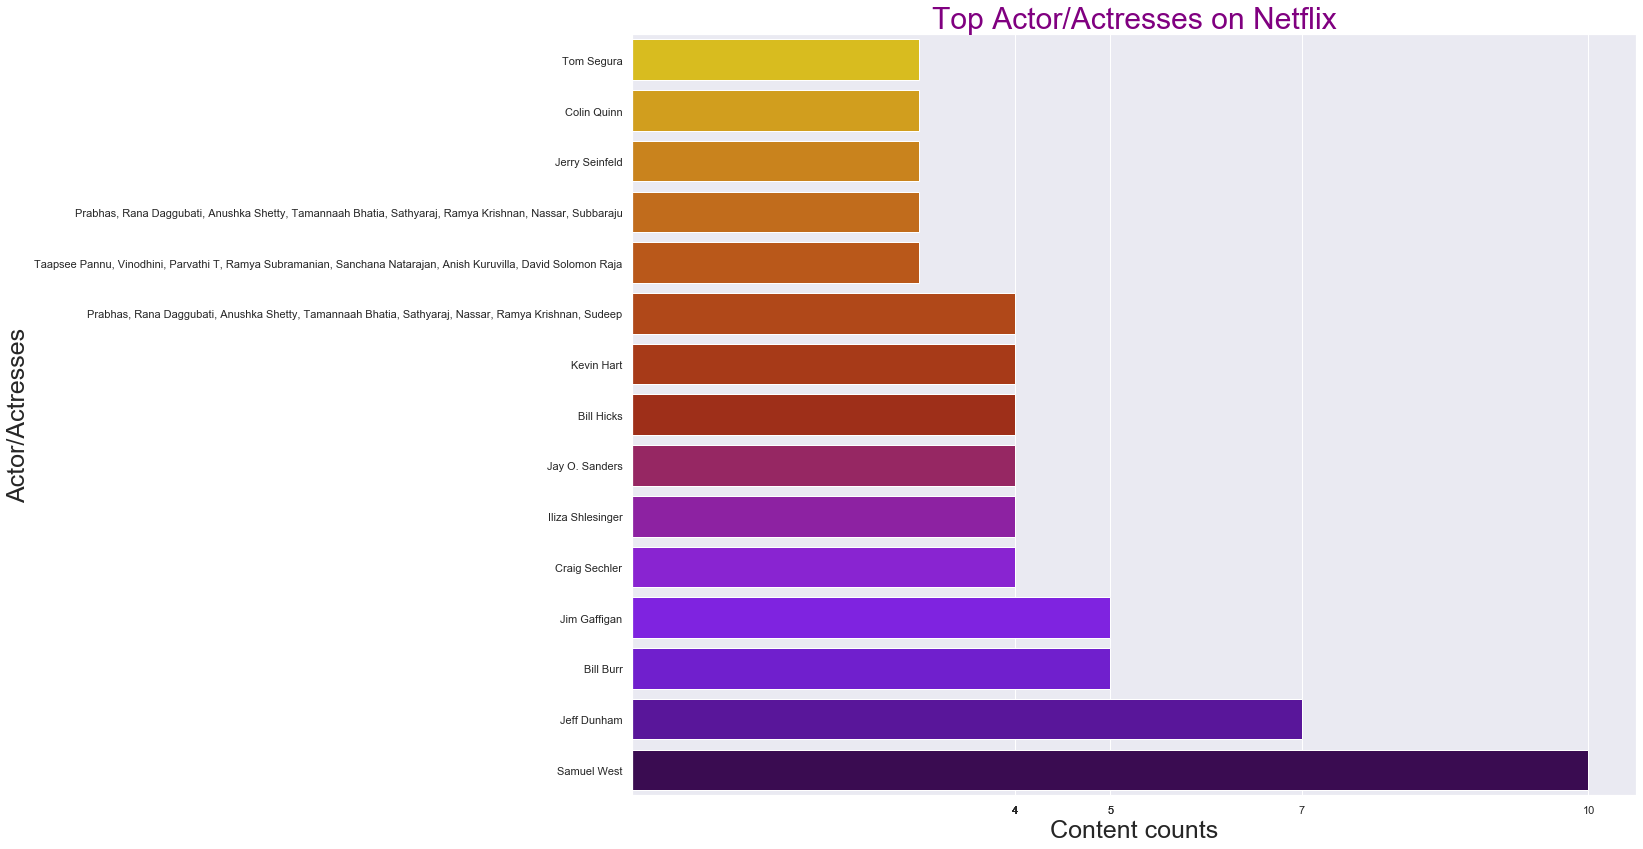

In [72]:
plt.figure(figsize=(18,14))
sb.barplot(y= df.cast.value_counts()[:15].sort_values().index, x=df.cast.value_counts()[:15].sort_values().values,palette='gnuplot_r');
plt.title('Top Actor/Actresses on Netflix', color='purple', fontsize=30)
plt.xticks(df.cast.value_counts()[:10].sort_values().values);
plt.ylabel('Actor/Actresses', fontsize=25);
plt.xlabel('Content counts', fontsize=25);

- Actor **'Samuel West'** has highest number of movies/Tv shows on Netflix.

### --> Best Month for directors to release content

#### We can analyse the months in which least amount of contents are added, that months can be best for directors to release their content for better audience attention.

In [41]:
df_copy = df.copy()
net_date = df_copy[['date_added']]
net_date['year'] = net_date['date_added'].apply(lambda x : x.split(', ')[-1])
net_date['month'] = net_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df_copy = net_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T


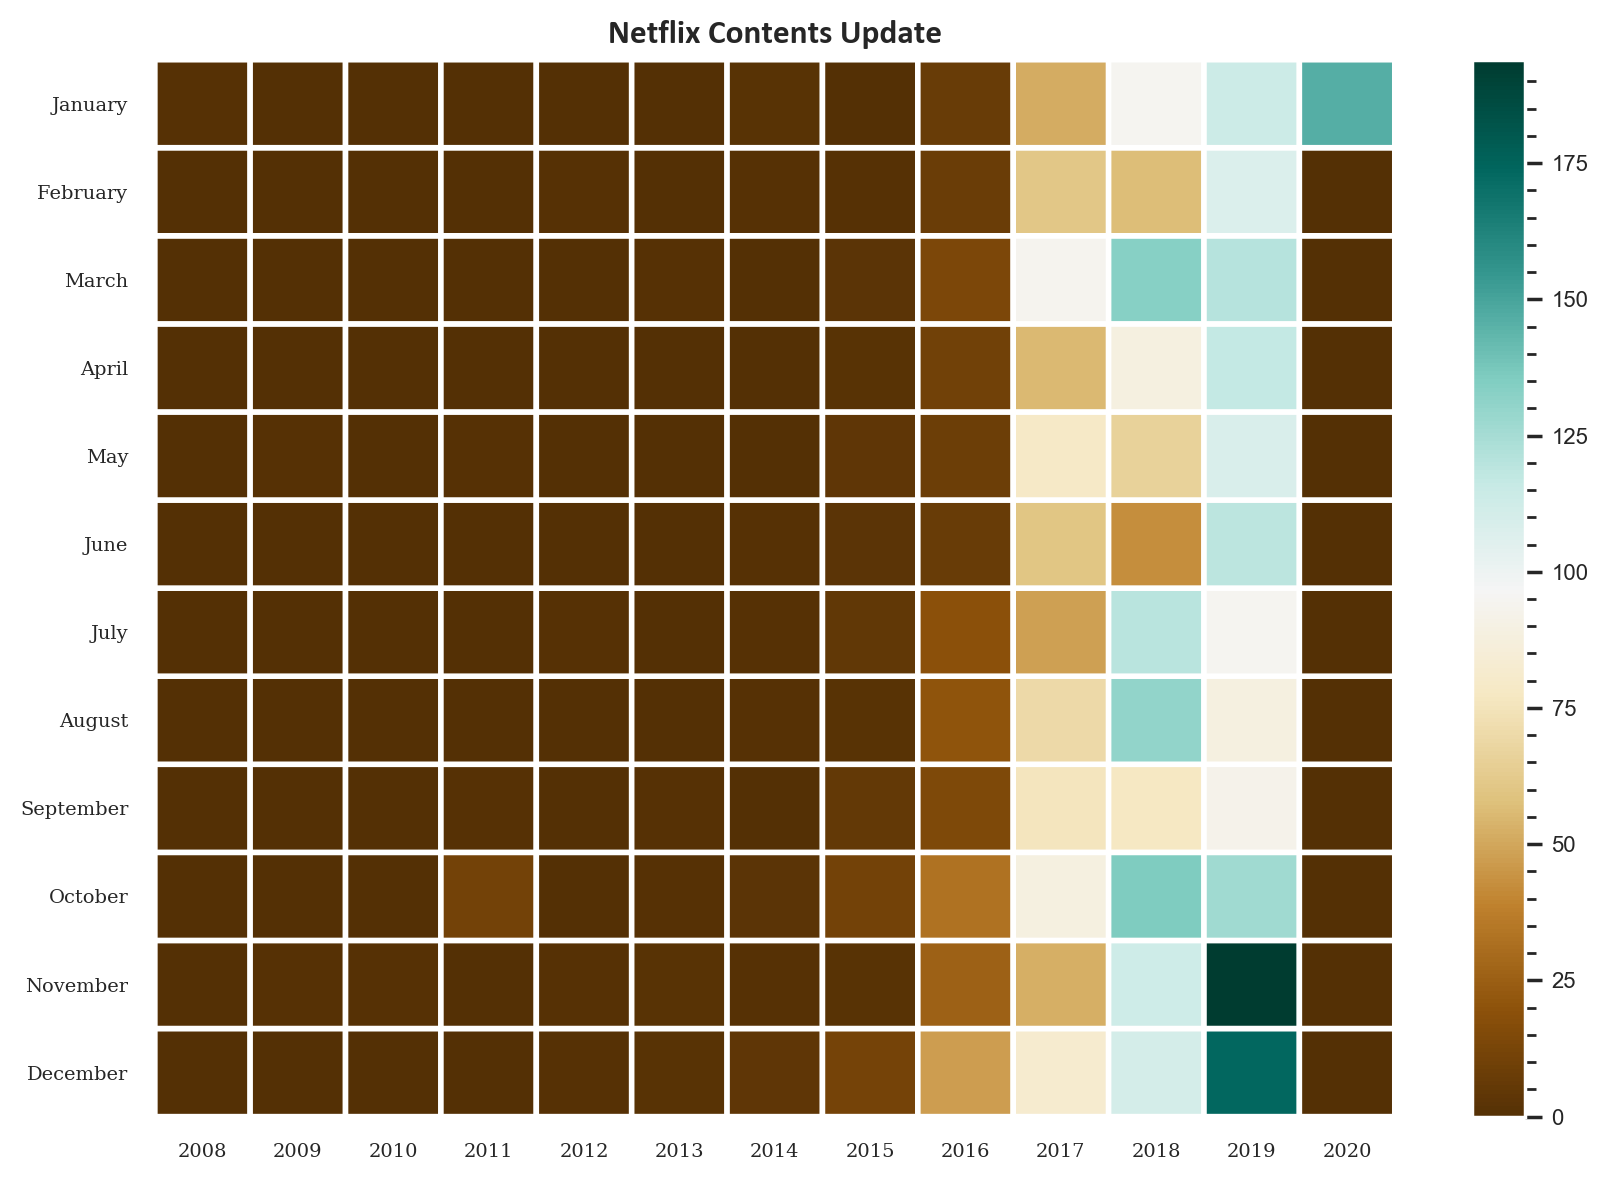

In [96]:
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df_copy, cmap='BrBG', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df_copy.columns), 1), df_copy.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df_copy.index), 1), df_copy.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold')
cbar = plt.colorbar()
cbar.solids.set_edgecolor("face")

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

## 4. Netflix Recommendation System

## Content Based Filtering

- For this recommender system the content of the movie (cast, description, director,genre etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

![](https://miro.medium.com/max/998/1*O_GU8xLVlFx8WweIzKNCNw.png)

## Plot description based Recommendation System

- We will calculate similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the **description** feature of our dataset.

In [24]:
df['description'].head()

0    Before planning an awesome wedding for his gra...
4    When nerdy high schooler Dani finally attracts...
6    In a dystopian future, an insurance adjuster f...
7    Fabrizio Copano takes audience participation t...
9    A struggling couple can't believe their luck w...
Name: description, dtype: object

We need to convert the word vector of each overview.We'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each description.The overall importance of each word to the documents in which they appear is equal to TF * IDF.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

In [26]:
#Replace NaN with an empty string
df['description'] = df['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(3909, 12445)

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's **linear_kernel()** instead of cosine_similarities() since it is faster.

In [27]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

-- we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [28]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

-- Let's define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies.

In [29]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [33]:
get_recommendations('#realityhigh')

4502            Luck by Chance
4042            Velvet Buzzsaw
3317         Where's the Money
5447                  Band Aid
4183                     Bhoot
2151              5 Flights Up
1550                    Tattah
2465              Step Outside
172     I Am Not Madame Bovary
1785                    Spivak
Name: title, dtype: object

In [38]:
get_recommendations('PK')

2814               The Unborn Child
491                        Security
4458                          Lilli
2078                  Oversize Cops
4836             Buster's Mal Heart
3505    Dragonheart 3: The Sorcerer
1017               The Sea of Trees
2614         Antariksha Ke Rakhwale
1918                  The Next Skin
4431                    The Lobster
Name: title, dtype: object

- This is completely plot based recommendations. we can see these are not so accurate, so we can try to add more metrics to improve model performance.

## Multiple metrics(Genre,cast,director) based Recommendation System

From the Genre,cast and director features, we need to extract the three most important actors, the director and genres associated with that movie.

In [63]:
features=['Genre','director','cast','description','title']
filters = df[features]

In [64]:
#Cleaning the data by making all the words in lower case.
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [65]:
for feature in features:
    filters[feature] = filters[feature].apply(clean_data)
    
filters.head()

,Genre,director,cast,description,title
0,"children&familymovies,comedies","richardfinn,timmaltby","alanmarriott,andrewtoth,briandobson,colehoward...",beforeplanninganawesomeweddingforhisgrandfathe...,normofthenorth:kingsizedadventure
4,comedies,fernandolebrija,"nestacooper,katewalsh,johnmichaelhiggins,keith...",whennerdyhighschoolerdanifinallyattractstheint...,#realityhigh
6,"internationalmovies,sci-fi&fantasy,thrillers",gabeibáñez,"antoniobanderas,dylanmcdermott,melaniegriffith...","inadystopianfuture,aninsuranceadjusterforatech...",automata
7,stand-upcomedy,"rodrigotoro,franciscoschultz",fabriziocopano,fabriziocopanotakesaudienceparticipationtothen...,fabriziocopano:solopiensoenmi
9,"action&adventure,thrillers",henrikrubengenz,"jamesfranco,katehudson,tomwilkinson,omarsy,sam...",astrugglingcouplecan'tbelievetheirluckwhenthey...,goodpeople


- We can now create our "metadata soup", which is a string that contains all the metadata that we want to feed to our vectorizer.

In [66]:
def create_soup(x):
    return x['director'] + ' ' + x['cast'] + ' ' +x['Genre']+' '+ x['description']

In [67]:
filters['soup'] = filters.apply(create_soup, axis=1)

The next steps are the same as what we did with our plot description based recommender. One important difference is that we use the **CountVectorizer()** instead of TF-IDF.

In [68]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filters['soup'])

In [69]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [70]:
filters

,Genre,director,cast,description,title,soup
0,"children&familymovies,comedies","richardfinn,timmaltby","alanmarriott,andrewtoth,briandobson,colehoward...",beforeplanninganawesomeweddingforhisgrandfathe...,normofthenorth:kingsizedadventure,"richardfinn,timmaltby alanmarriott,andrewtoth,..."
4,comedies,fernandolebrija,"nestacooper,katewalsh,johnmichaelhiggins,keith...",whennerdyhighschoolerdanifinallyattractstheint...,#realityhigh,"fernandolebrija nestacooper,katewalsh,johnmich..."
6,"internationalmovies,sci-fi&fantasy,thrillers",gabeibáñez,"antoniobanderas,dylanmcdermott,melaniegriffith...","inadystopianfuture,aninsuranceadjusterforatech...",automata,"gabeibáñez antoniobanderas,dylanmcdermott,mela..."
7,stand-upcomedy,"rodrigotoro,franciscoschultz",fabriziocopano,fabriziocopanotakesaudienceparticipationtothen...,fabriziocopano:solopiensoenmi,"rodrigotoro,franciscoschultz fabriziocopano st..."
9,"action&adventure,thrillers",henrikrubengenz,"jamesfranco,katehudson,tomwilkinson,omarsy,sam...",astrugglingcouplecan'tbelievetheirluckwhenthey...,goodpeople,"henrikrubengenz jamesfranco,katehudson,tomwilk..."
...,...,...,...,...,...,...
6142,"britishtvshows,realitytv",andydevonshire,"melgiedroyc,sueperkins,maryberry,paulhollywood",atalentedbatchofamateurbakersfaceoffina10-week...,thegreatbritishbakingshow,"andydevonshire melgiedroyc,sueperkins,maryberr..."
6158,"kids'tv,tvaction&adventure",thomasastruc,"cristinavee,brycepapenbrook,keithsilverstein,m...","whenparisisinperil,marinettebecomesladybug.lit...",miraculous:talesofladybug&catnoir,"thomasastruc cristinavee,brycepapenbrook,keith..."
6167,"crimetvshows,internationaltvshows,tvdramas","vikramadityamotwane,anuragkashyap","saifalikhan,nawazuddinsiddiqui,radhikaapte,nee...",alinkintheirpastsleadsanhonestcoptoafugitivega...,sacredgames,"vikramadityamotwane,anuragkashyap saifalikhan,..."
6182,"internationaltvshows,koreantvshows,stand-upcom...",jung-ahim,"ho-dongkang,soo-geunlee,sang-minlee,young-chul...","malecelebsplaymake-believeashighschoolers,welc...",menonamission,"jung-ahim ho-dongkang,soo-geunlee,sang-minlee,..."


In [71]:
# Reset index of our main DataFrame and construct reverse mapping as before
filters=filters.reset_index()
indices = pd.Series(filters.index, index=filters['title'])

In [72]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [73]:
get_recommendations_new('PK', cosine_sim2)

5054                           3 Idiots
5494       The Legend of Michael Mishra
3093                  Anthony Kaun Hai?
691                               Sanju
4110                   Taare Zameen Par
2194                    Chal Dhar Pakad
1449                    Chance Pe Dance
1746    EMI: Liya Hai To Chukana Padega
226                            Arisan 2
2198                        Irada Pakka
Name: title, dtype: object

In [74]:
get_recommendations_new('Black panther', cosine_sim2)

2993                                How It Ends
1965                    Halo: The Fall of Reach
2726                                Singularity
3036                                   Inkheart
561              Scorpion King 5: Book of Souls
824                                   Supergirl
2711                       The Space Between Us
3766                 Di Renjie zhi Sidatianwang
3931    Marvel's Iron Man & Hulk: Heroes United
1523                           Waarrior Savitri
Name: title, dtype: object

In [76]:
get_recommendations_new('Naruto', cosine_sim2)

722                     Naruto Shippûden the Movie: Bonds
384      Naruto the Movie 2: Legend of the Stone of Gelel
381                       Naruto Shippuden : Blood Prison
382          Naruto Shippûden the Movie: The Will of Fire
723                           Naruto Shippuden: The Movie
385     Naruto the Movie 3: Guardians of the Crescent ...
6024                     Fullmetal Alchemist: Brotherhood
4495                                     Girls und Panzer
1925                                             A.I.C.O.
383           Naruto Shippuden: The Movie: The Lost Tower
Name: title, dtype: object

### We can see that our improved Recommendation System works very well.